In [19]:
# Step 1: Import Libraries
# =============================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules



In [20]:
# Step 2: Load Dataset
# =============================
df = pd.read_csv("retail_transactions.csv")
print("✅ Dataset loaded successfully!")
print("Shape:", df.shape)
print(df.head())

✅ Dataset loaded successfully!
Shape: (50, 2)
   TransactionID                    Items
0              1          Bread,Milk,Eggs
1              2  Bread,Diapers,Beer,Eggs
2              3   Milk,Diapers,Beer,Coke
3              4  Bread,Milk,Diapers,Beer
4              5  Bread,Milk,Diapers,Coke


In [21]:
# Step 3: Transaction Encoding
# =============================
# Split items in each transaction into a list
transactions = df['Items'].apply(lambda x: x.split(',')).tolist()

# Encode transactions into a one-hot DataFrame
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)
print("\n✅ Encoded Transactions:")
print(df_encoded.head())


✅ Encoded Transactions:
    Beer  Bread  Butter  Chips   Coke  Diapers   Eggs    Jam   Milk
0  False   True   False  False  False    False   True  False   True
1   True   True   False  False  False     True   True  False  False
2   True  False   False  False   True     True  False  False   True
3   True   True   False  False  False     True  False  False   True
4  False   True   False  False   True     True  False  False   True


In [22]:
# Step 4: Apply Apriori Algorithm
# =============================
frequent_items = apriori(df_encoded, min_support=0.05, use_colnames=True)
frequent_items = frequent_items.sort_values(by="support", ascending=False)

print("\n✅ Frequent Itemsets Found:", len(frequent_items))
print(frequent_items.head(10))



✅ Frequent Itemsets Found: 45
    support         itemsets
7      0.62           (Milk)
1      0.58          (Bread)
0      0.46           (Beer)
2      0.40         (Butter)
19     0.38    (Bread, Milk)
6      0.34           (Eggs)
5      0.32        (Diapers)
14     0.30  (Bread, Butter)
3      0.28          (Chips)
23     0.28   (Butter, Milk)


In [23]:
# Step 5: Generate Association Rules
# =============================
if not frequent_items.empty:
    rules = association_rules(frequent_items, metric="confidence", min_threshold=0.3)
    rules = rules.sort_values(by="lift", ascending=False)
    print("\n✅ Association Rules Generated:", len(rules))
    print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))
else:
    print("⚠️ No frequent itemsets found. Try lowering min_support.")



✅ Association Rules Generated: 69
         antecedents     consequents  support  confidence      lift
57  (Diapers, Chips)          (Beer)     0.06    1.000000  2.173913
64      (Eggs, Beer)         (Chips)     0.06    0.500000  1.785714
53    (Butter, Eggs)   (Bread, Milk)     0.08    0.666667  1.754386
43      (Milk, Beer)       (Diapers)     0.10    0.555556  1.736111
44         (Diapers)    (Milk, Beer)     0.10    0.312500  1.736111
62    (Coke, Butter)         (Bread)     0.06    1.000000  1.724138
8            (Chips)          (Beer)     0.22    0.785714  1.708075
9             (Beer)         (Chips)     0.22    0.478261  1.708075
63     (Chips, Eggs)          (Beer)     0.06    0.750000  1.630435
51     (Bread, Eggs)  (Butter, Milk)     0.08    0.444444  1.587302


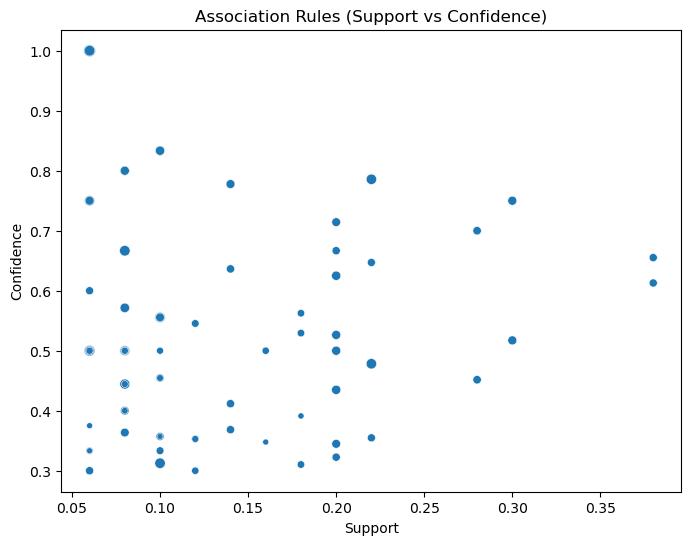

In [24]:
# Step 6: Visualization - Support vs Confidence
# =============================
if not frequent_items.empty and not rules.empty:
    plt.figure(figsize=(8,6))
    sns.scatterplot(x="support", y="confidence", size="lift", data=rules, legend=False)
    plt.title("Association Rules (Support vs Confidence)")
    plt.xlabel("Support")
    plt.ylabel("Confidence")
    plt.show()
else:
    print("⚠️ No rules to visualize.")

In [25]:
# Step 7: Display Top 5 Rules
# =============================
if not rules.empty:
    print("\n🧠 Top 5 Association Rules:")
    for i, row in rules.head(5).iterrows():
        print(f"{set(row['antecedents'])} → {set(row['consequents'])} "
              f"(support={row['support']:.2f}, confidence={row['confidence']:.2f}, lift={row['lift']:.2f})")
else:
    print("⚠️ No rules available to display.")


🧠 Top 5 Association Rules:
{'Diapers', 'Chips'} → {'Beer'} (support=0.06, confidence=1.00, lift=2.17)
{'Eggs', 'Beer'} → {'Chips'} (support=0.06, confidence=0.50, lift=1.79)
{'Butter', 'Eggs'} → {'Bread', 'Milk'} (support=0.08, confidence=0.67, lift=1.75)
{'Milk', 'Beer'} → {'Diapers'} (support=0.10, confidence=0.56, lift=1.74)
{'Diapers'} → {'Milk', 'Beer'} (support=0.10, confidence=0.31, lift=1.74)
